In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/energydata_complete.csv")

In [3]:
ts = df["Appliances"]

In [4]:
ts.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

In [5]:
dates = pd.to_datetime(df.date)

In [6]:
series = np.asarray(ts.values)

In [7]:
time = np.arange(series.shape[0])

In [8]:
def plot_series(time, series, format = "-", start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

## Forecasting with Machine Learning

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(series) #instead of random values we are doing it with the data
dataset = dataset.window(5,shift = 1, drop_remainder = True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size = 20000) #IID gd works best #buffersize must be greater or equal to the number of examples
dataset = dataset.batch(32).prefetch(1) # you probably will want bigger batchs like 32 / 64
for x, y in dataset:
    print(x.numpy(), y.numpy())

[[ 50  50  50  50]
 [ 70  70  50  50]
 [ 60  50  50  50]
 [ 50  40  50  50]
 [ 70  60  70  60]
 [260 230 470 400]
 [ 30  40  30  70]
 [ 50  60  60  70]
 [ 50  50  40  70]
 [ 70  70  40  40]
 [100  90 130 120]
 [ 50  40  40  40]
 [ 90  70  70  50]
 [ 50  40  40  40]
 [ 70 200 280 180]
 [ 40  50  50  50]
 [ 50  70 100  60]
 [ 50  50  50  50]
 [ 60  50  60  60]
 [220  70  60  50]
 [ 60  50  50  60]
 [ 70 390 640 510]
 [740 590 380 280]
 [ 60  80  40 290]
 [ 60  50  20  20]
 [ 90 190 370 280]
 [ 20  40  40  40]
 [110 100  90  90]
 [110 110 110 110]
 [ 70  40  40  40]
 [ 50  40  60  40]
 [110 100 110 110]] [[ 50]
 [ 50]
 [ 60]
 [ 50]
 [ 70]
 [290]
 [ 60]
 [ 70]
 [180]
 [ 50]
 [140]
 [ 40]
 [ 50]
 [ 30]
 [180]
 [ 50]
 [ 60]
 [ 40]
 [ 50]
 [ 60]
 [ 50]
 [300]
 [240]
 [130]
 [ 30]
 [130]
 [ 40]
 [ 90]
 [110]
 [ 30]
 [ 60]
 [ 90]]
[[360 680 520 430]
 [ 80  80 400 400]
 [ 60  60  60  50]
 [ 50  80  40  50]
 [100 100  70  80]
 [ 50  60  60  50]
 [ 60  50  50  70]
 [130 130 150 120]
 [ 60  50  50 

[[ 90  90  90  80]
 [ 80  60  80  70]
 [230 100  90  90]
 [130 110 120 100]
 [ 60  50  60  60]
 [ 90 190 420 230]
 [110 110 630 400]
 [ 40  40  50  50]
 [110 400 400 390]
 [ 50  90 100  60]
 [ 60  50  70  60]
 [ 40  50  50  50]
 [ 60  50  60  50]
 [ 40  60  40  50]
 [100  80  90 100]
 [ 60  50  70  50]
 [ 40  90  70 280]
 [ 70  60  60  60]
 [ 60  50  60  50]
 [ 60  60  60  70]
 [100  90  70  70]
 [300  70 360 170]
 [ 60  40  20  30]
 [ 40  30  40  30]
 [ 70  60  70  70]
 [ 50  50  60  40]
 [ 60  70  50  60]
 [ 50  50  60  90]
 [ 30  30  20  20]
 [ 40  40  40  50]
 [390 410 630 450]
 [ 40  40  40  40]] [[ 90]
 [ 70]
 [110]
 [110]
 [ 60]
 [650]
 [350]
 [ 50]
 [240]
 [ 40]
 [ 70]
 [ 60]
 [ 30]
 [ 40]
 [ 90]
 [ 60]
 [180]
 [ 50]
 [ 40]
 [ 60]
 [ 60]
 [330]
 [ 20]
 [ 50]
 [ 70]
 [ 50]
 [ 60]
 [ 70]
 [ 50]
 [ 50]
 [420]
 [ 40]]
[[ 40  20  50  50]
 [ 40  30  40  40]
 [ 50  50  40  50]
 [340 100  90 110]
 [ 50  50  50  50]
 [150  80  60  60]
 [100 100  90 100]
 [ 40  30  20  30]
 [ 50  30  40 

In [10]:
def window_dataset(series, window_size, batch_size = 32, shuffle_buffer = 20000):
    dataset = tf.data.Dataset.from_tensor_slices(series) #instead of random values we are doing it with the data
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(buffer_size = shuffle_buffer) #IID gd works best #buffersize must be greater or equal to the number of examples
    dataset = dataset.batch(batch_size).prefetch(1) # you probably will want bigger batchs like 32 / 64
    return dataset

In [11]:
split_time = int(series.shape[0] * 0.8)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [12]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss = keras.losses.mean_squared_error,
             optimizer = optimizer,
             metrics = ["mse"])
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model.fit(train_set, epochs = 500,
         validation_data = valid_set,
         callbacks = [early_stopping])

Epoch 1/500
493/493 [==============================] - 2s 5ms/step - loss: 121902.1824 - mse: 121922.8984 - val_loss: 95044.7914 - val_mse: 95357.5312
Epoch 2/500
493/493 [==============================] - 2s 4ms/step - loss: 113334.7055 - mse: 113266.9375 - val_loss: 87872.4018 - val_mse: 88027.1641
Epoch 3/500
493/493 [==============================] - 2s 4ms/step - loss: 105202.1297 - mse: 105260.7031 - val_loss: 81028.6294 - val_mse: 81267.2422
Epoch 4/500
493/493 [==============================] - 2s 4ms/step - loss: 97860.1031 - mse: 97893.5391 - val_loss: 75265.2882 - val_mse: 75056.5703
Epoch 5/500
493/493 [==============================] - 2s 4ms/step - loss: 91064.0752 - mse: 91091.8125 - val_loss: 69141.1597 - val_mse: 69333.6094
Epoch 6/500
493/493 [==============================] - 2s 4ms/step - loss: 84791.6113 - mse: 84821.5391 - val_loss: 64063.4047 - val_mse: 64046.7461
Epoch 7/500
493/493 [==============================] - 2s 4ms/step - loss: 79126.7490 - mse: 79077.2

493/493 [==============================] - 2s 4ms/step - loss: 18974.2871 - mse: 18987.2480 - val_loss: 12820.9003 - val_mse: 12808.8340
Epoch 56/500
493/493 [==============================] - 2s 4ms/step - loss: 18631.3776 - mse: 18644.2500 - val_loss: 12550.6961 - val_mse: 12580.5557
Epoch 57/500
493/493 [==============================] - 2s 4ms/step - loss: 18299.5404 - mse: 18310.4102 - val_loss: 12311.7321 - val_mse: 12357.8613
Epoch 58/500
493/493 [==============================] - 2s 4ms/step - loss: 17977.8758 - mse: 17985.1484 - val_loss: 12181.9259 - val_mse: 12140.9424
Epoch 59/500
493/493 [==============================] - 2s 4ms/step - loss: 17659.7875 - mse: 17668.7676 - val_loss: 11893.9659 - val_mse: 11929.8086
Epoch 60/500
493/493 [==============================] - 2s 4ms/step - loss: 17345.2710 - mse: 17358.8672 - val_loss: 11675.0627 - val_mse: 11723.7832
Epoch 61/500
493/493 [==============================] - 2s 4ms/step - loss: 17046.6645 - mse: 17055.7207 - val_lo

493/493 [==============================] - 2s 4ms/step - loss: 8828.7588 - mse: 8819.8574 - val_loss: 6076.9358 - val_mse: 6092.0249
Epoch 111/500
493/493 [==============================] - 2s 4ms/step - loss: 8729.0369 - mse: 8734.3242 - val_loss: 6041.0421 - val_mse: 6036.6226
Epoch 112/500
493/493 [==============================] - 2s 4ms/step - loss: 8643.4462 - mse: 8650.5527 - val_loss: 5956.9008 - val_mse: 5981.6343
Epoch 113/500
493/493 [==============================] - 2s 4ms/step - loss: 8569.8150 - mse: 8568.3887 - val_loss: 5917.6117 - val_mse: 5927.8579
Epoch 114/500
493/493 [==============================] - 2s 4ms/step - loss: 8482.9091 - mse: 8488.6650 - val_loss: 5854.7434 - val_mse: 5876.0771
Epoch 115/500
493/493 [==============================] - 2s 4ms/step - loss: 8411.5819 - mse: 8410.9580 - val_loss: 5837.3346 - val_mse: 5826.0664
Epoch 116/500
493/493 [==============================] - 2s 4ms/step - loss: 8354.1733 - mse: 8335.4854 - val_loss: 5880.2946 - val_

Epoch 166/500
493/493 [==============================] - 2s 4ms/step - loss: 6116.0054 - mse: 6117.7642 - val_loss: 4342.6925 - val_mse: 4361.8008
Epoch 167/500
493/493 [==============================] - 2s 4ms/step - loss: 6094.3177 - mse: 6094.3921 - val_loss: 4332.2596 - val_mse: 4347.6309
Epoch 168/500
493/493 [==============================] - 2s 4ms/step - loss: 6075.4041 - mse: 6071.6128 - val_loss: 4357.9423 - val_mse: 4333.8027
Epoch 169/500
493/493 [==============================] - 2s 4ms/step - loss: 6043.1399 - mse: 6049.1201 - val_loss: 4332.0650 - val_mse: 4319.7231
Epoch 170/500
493/493 [==============================] - 2s 4ms/step - loss: 6029.0484 - mse: 6027.1982 - val_loss: 4288.6070 - val_mse: 4306.5400
Epoch 171/500
493/493 [==============================] - 2s 4ms/step - loss: 6000.8241 - mse: 6005.7109 - val_loss: 4274.1960 - val_mse: 4293.4424
Epoch 172/500
493/493 [==============================] - 2s 4ms/step - loss: 5980.4294 - mse: 5984.6445 - val_loss: 42

Epoch 222/500
493/493 [==============================] - 2s 4ms/step - loss: 5324.0837 - mse: 5329.9473 - val_loss: 3877.8772 - val_mse: 3895.8796
Epoch 223/500
493/493 [==============================] - 2s 4ms/step - loss: 5315.7750 - mse: 5321.7729 - val_loss: 3922.9313 - val_mse: 3891.1860
Epoch 224/500
493/493 [==============================] - 2s 4ms/step - loss: 5317.7956 - mse: 5313.6982 - val_loss: 3869.1187 - val_mse: 3886.6707
Epoch 225/500
493/493 [==============================] - 2s 4ms/step - loss: 5313.0361 - mse: 5306.0015 - val_loss: 3865.6071 - val_mse: 3882.5640
Epoch 226/500
493/493 [==============================] - 2s 4ms/step - loss: 5292.5577 - mse: 5298.1523 - val_loss: 3891.0152 - val_mse: 3878.1038
Epoch 227/500
493/493 [==============================] - 2s 4ms/step - loss: 5284.7746 - mse: 5290.6196 - val_loss: 3914.3569 - val_mse: 3873.7158
Epoch 228/500
493/493 [==============================] - 2s 4ms/step - loss: 5278.6500 - mse: 5283.3745 - val_loss: 39

Epoch 278/500
493/493 [==============================] - 2s 4ms/step - loss: 5008.7318 - mse: 5013.2163 - val_loss: 3720.5248 - val_mse: 3727.1555
Epoch 279/500
493/493 [==============================] - 2s 4ms/step - loss: 5012.7210 - mse: 5009.6216 - val_loss: 3724.4616 - val_mse: 3725.1667
Epoch 280/500
493/493 [==============================] - 2s 4ms/step - loss: 5004.6308 - mse: 5005.5044 - val_loss: 3706.1222 - val_mse: 3723.7129
Epoch 281/500
493/493 [==============================] - 2s 4ms/step - loss: 4999.0472 - mse: 5001.6982 - val_loss: 3707.1911 - val_mse: 3721.5959
Epoch 282/500
493/493 [==============================] - 2s 4ms/step - loss: 4992.9821 - mse: 4997.9434 - val_loss: 3704.9766 - val_mse: 3719.7175
Epoch 283/500
493/493 [==============================] - 2s 4ms/step - loss: 4988.9448 - mse: 4994.1172 - val_loss: 3701.5591 - val_mse: 3717.8535
Epoch 284/500
493/493 [==============================] - 2s 4ms/step - loss: 4987.9418 - mse: 4990.4912 - val_loss: 37

Epoch 334/500
493/493 [==============================] - 2s 4ms/step - loss: 4857.8572 - mse: 4848.7627 - val_loss: 3647.8997 - val_mse: 3646.9431
Epoch 335/500
493/493 [==============================] - 2s 4ms/step - loss: 4842.7128 - mse: 4846.4780 - val_loss: 3641.8724 - val_mse: 3645.5989
Epoch 336/500
493/493 [==============================] - 2s 4ms/step - loss: 4844.7360 - mse: 4844.2729 - val_loss: 3628.8243 - val_mse: 3644.9368
Epoch 337/500
493/493 [==============================] - 2s 4ms/step - loss: 4841.5719 - mse: 4842.3828 - val_loss: 3681.1992 - val_mse: 3644.0042
Epoch 338/500
493/493 [==============================] - 2s 4ms/step - loss: 4835.4996 - mse: 4840.1357 - val_loss: 3638.8227 - val_mse: 3642.6987
Epoch 339/500
493/493 [==============================] - 2s 4ms/step - loss: 4832.5408 - mse: 4837.7949 - val_loss: 3624.8910 - val_mse: 3641.7300
Epoch 340/500
493/493 [==============================] - 2s 4ms/step - loss: 4832.5722 - mse: 4835.7231 - val_loss: 36

Epoch 390/500
493/493 [==============================] - 2s 4ms/step - loss: 4769.0676 - mse: 4749.7920 - val_loss: 3586.2484 - val_mse: 3601.5439
Epoch 391/500
493/493 [==============================] - 2s 4ms/step - loss: 4748.8517 - mse: 4748.4204 - val_loss: 3631.0490 - val_mse: 3600.9065
Epoch 392/500
493/493 [==============================] - 2s 4ms/step - loss: 4742.1100 - mse: 4747.1187 - val_loss: 3598.9202 - val_mse: 3600.2126
Epoch 393/500
493/493 [==============================] - 2s 4ms/step - loss: 4755.9206 - mse: 4745.4434 - val_loss: 3597.5500 - val_mse: 3600.0688
Epoch 394/500
493/493 [==============================] - 2s 4ms/step - loss: 4744.4518 - mse: 4744.3604 - val_loss: 3583.2843 - val_mse: 3599.0813
Epoch 395/500
493/493 [==============================] - 2s 4ms/step - loss: 4741.5174 - mse: 4743.0449 - val_loss: 3605.1758 - val_mse: 3598.3052
Epoch 396/500
493/493 [==============================] - 2s 4ms/step - loss: 4738.3083 - mse: 4741.6841 - val_loss: 35

Epoch 446/500
493/493 [==============================] - 2s 4ms/step - loss: 4687.3385 - mse: 4685.9712 - val_loss: 3557.7938 - val_mse: 3573.4041
Epoch 447/500
493/493 [==============================] - 2s 4ms/step - loss: 4680.5728 - mse: 4685.0796 - val_loss: 3571.6532 - val_mse: 3573.0679
Epoch 448/500
493/493 [==============================] - 2s 4ms/step - loss: 4679.3739 - mse: 4684.1914 - val_loss: 3560.4834 - val_mse: 3572.6477
Epoch 449/500
493/493 [==============================] - 2s 4ms/step - loss: 4677.9438 - mse: 4683.0757 - val_loss: 3582.6141 - val_mse: 3572.7256
Epoch 450/500
493/493 [==============================] - 2s 4ms/step - loss: 4679.9814 - mse: 4682.3003 - val_loss: 3570.1086 - val_mse: 3571.9883
Epoch 451/500
493/493 [==============================] - 2s 4ms/step - loss: 4679.6708 - mse: 4681.4346 - val_loss: 3556.1396 - val_mse: 3571.7151
Epoch 452/500
493/493 [==============================] - 2s 4ms/step - loss: 4685.7921 - mse: 4680.5122 - val_loss: 35

In [13]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift = 1, drop_remainder = True)
    ds = ds.flat_map(lambda w : w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    return model.predict(ds)

In [14]:
lin_forecast = model_forecast(
    model,
    series[split_time - window_size: -1],
    window_size)
lin_forecast = lin_forecast[:,0]

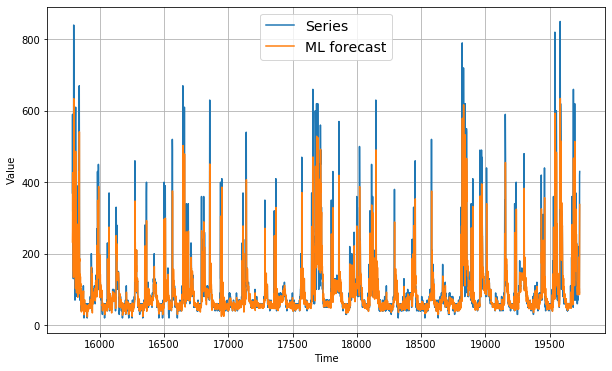

In [15]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, lin_forecast, label="ML forecast")

In [16]:
tf.keras.metrics.mse(x_valid, lin_forecast).numpy()

3711.4832

In [17]:
tf.keras.metrics.mae(x_valid, lin_forecast).numpy()

27.055275

* we surpassed the naive approach, this is now our best performance yet

### Using two relu dense layers

In [18]:
window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model2 = keras.models.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(learning_rate=1e-5)

model2.compile(loss = keras.losses.mean_squared_error,
             optimizer = optimizer,
             metrics = ["mse"])
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model2.fit(train_set, epochs = 500,
         validation_data = valid_set,
         callbacks = [early_stopping])

Epoch 1/500
493/493 [==============================] - 2s 5ms/step - loss: 25587.6269 - mse: 25592.8164 - val_loss: 16438.0370 - val_mse: 16501.9023
Epoch 2/500
493/493 [==============================] - 2s 4ms/step - loss: 19416.5993 - mse: 19433.5938 - val_loss: 12620.9949 - val_mse: 12653.8369
Epoch 3/500
493/493 [==============================] - 2s 4ms/step - loss: 15772.8038 - mse: 15776.3887 - val_loss: 10390.3773 - val_mse: 10375.5088
Epoch 4/500
493/493 [==============================] - 2s 4ms/step - loss: 13502.6944 - mse: 13513.0146 - val_loss: 8974.6571 - val_mse: 8999.1221
Epoch 5/500
493/493 [==============================] - 2s 4ms/step - loss: 12067.6181 - mse: 12079.0557 - val_loss: 8131.6214 - val_mse: 8164.7466
Epoch 6/500
493/493 [==============================] - 2s 4ms/step - loss: 11145.3239 - mse: 11144.7100 - val_loss: 7657.2011 - val_mse: 7642.0493
Epoch 7/500
493/493 [==============================] - 2s 4ms/step - loss: 10512.7939 - mse: 10516.2295 - val_lo

493/493 [==============================] - 2s 4ms/step - loss: 5950.1282 - mse: 5944.4829 - val_loss: 4478.0177 - val_mse: 4497.4282
Epoch 58/500
493/493 [==============================] - 2s 4ms/step - loss: 5916.8721 - mse: 5912.8838 - val_loss: 4459.5479 - val_mse: 4476.4893
Epoch 59/500
493/493 [==============================] - 2s 4ms/step - loss: 5878.0408 - mse: 5882.9805 - val_loss: 4448.7931 - val_mse: 4459.6343
Epoch 60/500
493/493 [==============================] - 2s 4ms/step - loss: 5849.0253 - mse: 5853.9077 - val_loss: 4425.4449 - val_mse: 4440.1348
Epoch 61/500
493/493 [==============================] - 2s 4ms/step - loss: 5823.1213 - mse: 5825.9238 - val_loss: 4430.0355 - val_mse: 4421.3125
Epoch 62/500
493/493 [==============================] - 2s 5ms/step - loss: 5796.1181 - mse: 5798.8438 - val_loss: 4389.2206 - val_mse: 4404.9863
Epoch 63/500
493/493 [==============================] - 2s 4ms/step - loss: 5768.9649 - mse: 5773.4136 - val_loss: 4393.3204 - val_mse: 4

493/493 [==============================] - 2s 4ms/step - loss: 5090.3946 - mse: 5091.8384 - val_loss: 4044.9992 - val_mse: 3963.3630
Epoch 114/500
493/493 [==============================] - 2s 4ms/step - loss: 5078.8390 - mse: 5084.0054 - val_loss: 3942.0361 - val_mse: 3958.5977
Epoch 115/500
493/493 [==============================] - 2s 4ms/step - loss: 5073.4422 - mse: 5076.6206 - val_loss: 3946.0170 - val_mse: 3953.7197
Epoch 116/500
493/493 [==============================] - 2s 4ms/step - loss: 5066.7745 - mse: 5069.8389 - val_loss: 4037.8031 - val_mse: 3949.4258
Epoch 117/500
493/493 [==============================] - 2s 4ms/step - loss: 5057.5044 - mse: 5062.4917 - val_loss: 3932.4407 - val_mse: 3944.4824
Epoch 118/500
493/493 [==============================] - 2s 4ms/step - loss: 5054.6985 - mse: 5055.7012 - val_loss: 3925.1956 - val_mse: 3941.2632
Epoch 119/500
493/493 [==============================] - 2s 4ms/step - loss: 5047.4657 - mse: 5049.1274 - val_loss: 3930.8817 - val_

Epoch 169/500
493/493 [==============================] - 2s 4ms/step - loss: 4825.2979 - mse: 4827.0610 - val_loss: 3770.0179 - val_mse: 3784.9954
Epoch 170/500
493/493 [==============================] - 2s 4ms/step - loss: 4819.6971 - mse: 4824.3638 - val_loss: 3791.6137 - val_mse: 3783.1689
Epoch 171/500
493/493 [==============================] - 2s 5ms/step - loss: 4816.9960 - mse: 4821.7349 - val_loss: 3770.1378 - val_mse: 3780.9253
Epoch 172/500
493/493 [==============================] - 2s 4ms/step - loss: 4818.7265 - mse: 4818.6021 - val_loss: 3763.7045 - val_mse: 3778.7578
Epoch 173/500
493/493 [==============================] - 2s 4ms/step - loss: 4811.1830 - mse: 4815.9004 - val_loss: 3759.9020 - val_mse: 3776.7888
Epoch 174/500
493/493 [==============================] - 2s 4ms/step - loss: 4808.6331 - mse: 4813.0605 - val_loss: 3758.8643 - val_mse: 3774.9341
Epoch 175/500
493/493 [==============================] - 2s 4ms/step - loss: 4818.5195 - mse: 4810.8066 - val_loss: 37

Epoch 225/500
493/493 [==============================] - 2s 4ms/step - loss: 4704.0055 - mse: 4701.9277 - val_loss: 3692.8221 - val_mse: 3700.7300
Epoch 226/500
493/493 [==============================] - 2s 4ms/step - loss: 4695.1901 - mse: 4700.1338 - val_loss: 3744.5230 - val_mse: 3699.4121
Epoch 227/500
493/493 [==============================] - 2s 4ms/step - loss: 4695.6364 - mse: 4698.4038 - val_loss: 3682.6637 - val_mse: 3698.8938
Epoch 228/500
493/493 [==============================] - 2s 4ms/step - loss: 4693.5078 - mse: 4697.4150 - val_loss: 3680.4675 - val_mse: 3697.2844
Epoch 229/500
493/493 [==============================] - 2s 4ms/step - loss: 4709.2868 - mse: 4695.7681 - val_loss: 3678.5099 - val_mse: 3695.6086
Epoch 230/500
493/493 [==============================] - 2s 5ms/step - loss: 4689.1627 - mse: 4694.0352 - val_loss: 3681.9374 - val_mse: 3694.5920
Epoch 231/500
493/493 [==============================] - 2s 4ms/step - loss: 4688.1193 - mse: 4692.0854 - val_loss: 36

Epoch 281/500
493/493 [==============================] - 2s 4ms/step - loss: 4638.8180 - mse: 4625.6362 - val_loss: 3694.4876 - val_mse: 3643.0708
Epoch 282/500
493/493 [==============================] - 2s 4ms/step - loss: 4629.4444 - mse: 4624.5088 - val_loss: 3651.4772 - val_mse: 3642.2927
Epoch 283/500
493/493 [==============================] - 2s 4ms/step - loss: 4618.9453 - mse: 4623.6694 - val_loss: 3690.9582 - val_mse: 3641.0244
Epoch 284/500
493/493 [==============================] - 2s 4ms/step - loss: 4622.1309 - mse: 4622.2080 - val_loss: 3624.6676 - val_mse: 3640.6160
Epoch 285/500
493/493 [==============================] - 2s 4ms/step - loss: 4637.2190 - mse: 4620.8516 - val_loss: 3624.1653 - val_mse: 3640.2148
Epoch 286/500
493/493 [==============================] - 2s 4ms/step - loss: 4621.6656 - mse: 4620.4185 - val_loss: 3670.5159 - val_mse: 3638.4614
Epoch 287/500
493/493 [==============================] - 2s 4ms/step - loss: 4616.7306 - mse: 4619.3599 - val_loss: 36

Epoch 337/500
493/493 [==============================] - 2s 4ms/step - loss: 4578.3137 - mse: 4574.0371 - val_loss: 3625.1710 - val_mse: 3602.6121
Epoch 338/500
493/493 [==============================] - 2s 4ms/step - loss: 4571.0625 - mse: 4573.2300 - val_loss: 3595.6186 - val_mse: 3602.1331
Epoch 339/500
493/493 [==============================] - 2s 4ms/step - loss: 4567.5036 - mse: 4572.6055 - val_loss: 3586.7020 - val_mse: 3601.7852
Epoch 340/500
493/493 [==============================] - 2s 4ms/step - loss: 4566.8528 - mse: 4571.6606 - val_loss: 3609.9636 - val_mse: 3601.1162
Epoch 341/500
493/493 [==============================] - 2s 4ms/step - loss: 4566.6326 - mse: 4570.9927 - val_loss: 3586.8134 - val_mse: 3600.3665
Epoch 342/500
493/493 [==============================] - 2s 4ms/step - loss: 4566.1009 - mse: 4570.2764 - val_loss: 3587.2539 - val_mse: 3599.7847
Epoch 343/500
493/493 [==============================] - 2s 4ms/step - loss: 4564.4193 - mse: 4569.3345 - val_loss: 36

Epoch 393/500
493/493 [==============================] - 2s 5ms/step - loss: 4532.3892 - mse: 4536.4194 - val_loss: 3561.1160 - val_mse: 3572.8997
Epoch 394/500
493/493 [==============================] - 2s 4ms/step - loss: 4531.7427 - mse: 4535.5913 - val_loss: 3561.2272 - val_mse: 3572.2124
Epoch 395/500
493/493 [==============================] - 2s 4ms/step - loss: 4530.9895 - mse: 4535.1665 - val_loss: 3570.5576 - val_mse: 3571.7192
Epoch 396/500
493/493 [==============================] - 2s 4ms/step - loss: 4533.4643 - mse: 4534.6987 - val_loss: 3607.2050 - val_mse: 3571.2258
Epoch 397/500
493/493 [==============================] - 2s 4ms/step - loss: 4530.3644 - mse: 4534.0024 - val_loss: 3561.9187 - val_mse: 3570.4941
Epoch 398/500
493/493 [==============================] - 2s 4ms/step - loss: 4535.8179 - mse: 4533.2754 - val_loss: 3556.8739 - val_mse: 3570.0908
Epoch 399/500
493/493 [==============================] - 2s 5ms/step - loss: 4529.0981 - mse: 4533.1382 - val_loss: 35

Epoch 449/500
493/493 [==============================] - 2s 4ms/step - loss: 4499.4684 - mse: 4504.2910 - val_loss: 3539.4674 - val_mse: 3546.8831
Epoch 450/500
493/493 [==============================] - 2s 4ms/step - loss: 4499.1003 - mse: 4503.2983 - val_loss: 3538.5446 - val_mse: 3546.8660
Epoch 451/500
493/493 [==============================] - 2s 4ms/step - loss: 4510.1331 - mse: 4503.4033 - val_loss: 3530.8968 - val_mse: 3545.9658
Epoch 452/500
493/493 [==============================] - 2s 4ms/step - loss: 4504.2262 - mse: 4502.8154 - val_loss: 3613.2482 - val_mse: 3545.5549
Epoch 453/500
493/493 [==============================] - 2s 5ms/step - loss: 4497.4982 - mse: 4502.3428 - val_loss: 3529.0083 - val_mse: 3545.3433
Epoch 454/500
493/493 [==============================] - 2s 4ms/step - loss: 4497.5840 - mse: 4501.3203 - val_loss: 3550.8342 - val_mse: 3545.1343
Epoch 455/500
493/493 [==============================] - 2s 4ms/step - loss: 4512.0532 - mse: 4501.3135 - val_loss: 35

In [19]:
lin_forecast = model_forecast(
    model2,
    series[split_time - window_size: -1],
    window_size)
lin_forecast = lin_forecast[:,0]

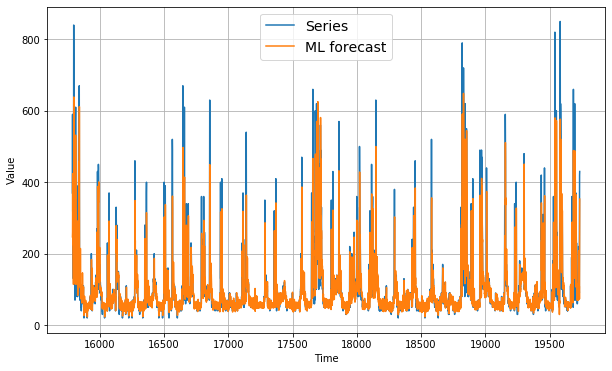

In [20]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, lin_forecast, label="ML forecast")

In [21]:
tf.keras.metrics.mse(x_valid, lin_forecast).numpy()

3682.0676

In [22]:
tf.keras.metrics.mae(x_valid, lin_forecast).numpy()

27.740515

* Slightly better in mse, which is our benchmark for the problem